In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt


In [35]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)


    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


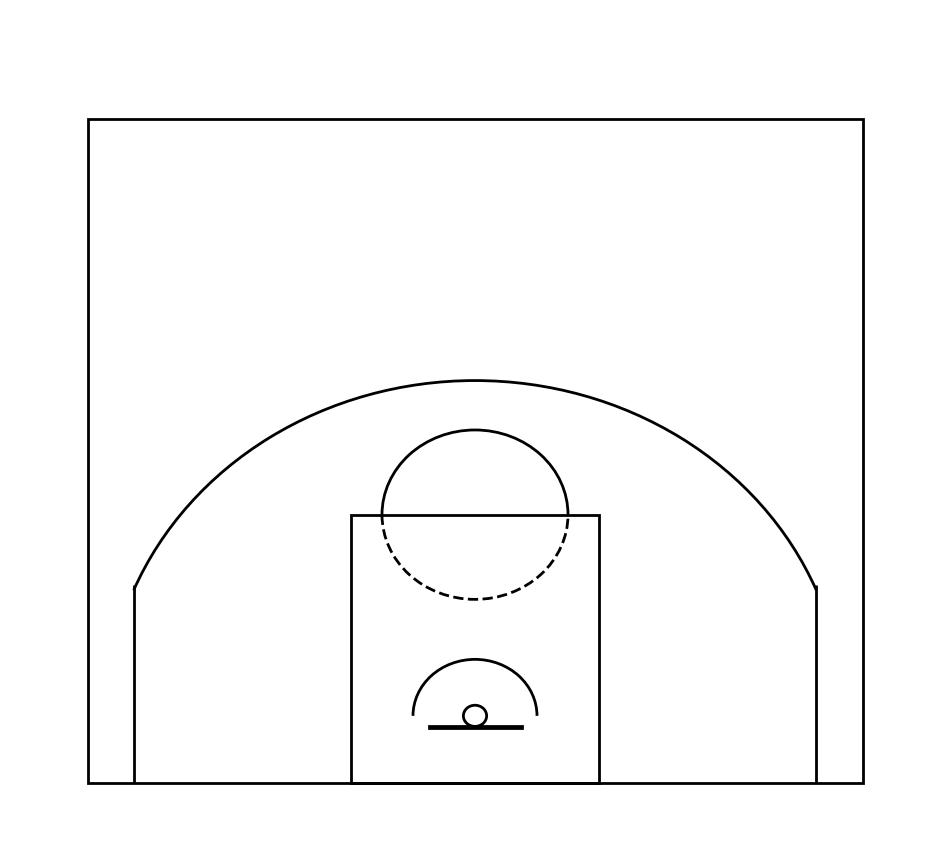

In [36]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis("off")
plt.show()

In [7]:
URL = "https://www.espn.com/nba/player/stats/_/id/1966/seasontype/3/lebron-james"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
page = requests.get(URL, headers=headers)
pageSoup = BeautifulSoup(page.content, 'html.parser')

#print(pageSoup.text)

In [55]:
# Trova la tabella dei dati dei postseason totals (è la terza tabella nella pagina)
tables = pageSoup.find_all('table', class_='Table Table--align-right')
if len(tables) >= 3:  # Verifica se ci sono almeno tre tabelle nella pagina
    table = tables[1]  # Prendi la terza tabella
else:
    print("Non sono presenti abbastanza tabelle nella pagina per estrarre i postseason totals.")
    exit()

# Estrai i dati dalla tabella e crea una lista di dizionari
data = []
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Ignora l'intestazione
        cols = row.find_all(['th', 'td'])
        cols = [col.text.strip() for col in cols]
        data.append({
            'FG': cols[0],
            'FG%': cols[1],
            '3PT': cols[2],
            '3P%': cols[3],
            'FT': cols[4],
            'FT%': cols[5],
            'OR': cols[6],
            'DR': cols[7],
            'REB': cols[8],
            'AST': cols[9],
            'BLK': cols[10],
            'STL': cols[11],
            'TO': cols[12],
            'PTS': cols[13]
        })

# Crea un DataFrame Pandas
dfAUX1 = pd.DataFrame(data)

# Stampa il DataFrame
#display(dfAUX1)

,FG,FG%,3PT,3P%,FT,FT%,OR,DR,REB,AST,BLK,STL,TO,PTS
0,146-307,47.6,21-63,33.3,87-118,73.7,22,83,105,76,9,18,44,65
1,166-399,41.6,21-75,28.0,148-196,75.5,26,135,161,159,10,34,40,66
2,113-275,41.1,18-70,25.7,122-167,73.1,16,86,102,99,17,23,33,54
3,159-312,51.0,27-81,33.3,149-199,74.9,19,109,128,102,12,23,30,38
4,106-211,50.2,20-50,40.0,88-120,73.3,15,87,102,84,20,19,23,42
5,174-373,46.6,30-85,35.3,119-156,76.3,34,142,176,123,25,35,56,66
6,251-502,50.0,22-85,25.9,173-234,73.9,54,170,224,129,16,43,47,81
7,212-432,49.1,36-96,37.5,136-175,77.7,37,156,193,152,18,41,43,70
8,192-340,56.5,35-86,40.7,129-160,80.6,14,127,141,95,11,36,46,61
9,227-544,41.7,25-110,22.7,122-167,73.1,37,189,226,169,21,33,58,82


In [56]:
teams = ['CLE', 'MIA', 'LAL']
season = ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']

data = []

# Aggiunta delle tuple per CLE
for year in season[:5]:
    data.append(('CLE', year))
    
# Aggiunta delle tuple per MIA
for year in season[5:9]:
    data.append(('MIA', year))

# Aggiunta delle tuple per CLE
for year in season[9:13]:
    data.append(('CLE', year))

# Aggiunta delle tuple per LAL
for year in season[13:]:
    data.append(('LAL', year))

# Creazione del DataFrame
dfAUX2 = pd.DataFrame(data, columns=['Team', 'Season'])

# Visualizzazione del DataFrame
#display(dfAUX2)

,Team,Season
0,CLE,2005-06
1,CLE,2006-07
2,CLE,2007-08
3,CLE,2008-09
4,CLE,2009-10
5,MIA,2010-11
6,MIA,2011-12
7,MIA,2012-13
8,MIA,2013-14
9,CLE,2014-15


In [57]:
dfPlayOff = dfAUX2.join(dfAUX1)
dfPlayOff.set_index(['Team', 'Season'], inplace=True)
display(dfPlayOff)

FG   FG%       3PT   3P%         FT   FT%   OR    DR  \
Team Season                                                                 
CLE  2005-06    146-307  47.6     21-63  33.3     87-118  73.7   22    83   
     2006-07    166-399  41.6     21-75  28.0    148-196  75.5   26   135   
     2007-08    113-275  41.1     18-70  25.7    122-167  73.1   16    86   
     2008-09    159-312  51.0     27-81  33.3    149-199  74.9   19   109   
     2009-10    106-211  50.2     20-50  40.0     88-120  73.3   15    87   
MIA  2010-11    174-373  46.6     30-85  35.3    119-156  76.3   34   142   
     2011-12    251-502  50.0     22-85  25.9    173-234  73.9   54   170   
     2012-13    212-432  49.1     36-96  37.5    136-175  77.7   37   156   
     2013-14    192-340  56.5     35-86  40.7    129-160  80.6   14   127   
CLE  2014-15    227-544  41.7    25-110  22.7    122-167  73.1   37   189   
     2015-16    219-417  52.5     32-94  34.0     82-124  66.1   42   158   
     2016-17    217-384  56.5    44-107  41.1    113-162  69.8   19   145   
     2017-18    275-510  53.9    39-114  34.2    159-213  74.6   31   169   
LAL  2019-20    214-382  56.0    44-119  37.0    108-150  72.0   28   198   
     2020-21     54-114  47.4     18-48  37.5      14-23  60.9    7    36   
     2021-22    147-295  49.8    28-106  26.4      70-92  76.1   25   133   
     2022-23      56-99  56.6     10-26  38.5      17-23  73.9    4    30   
     2023-24  2928-5896  49.7  470-1415  33.2  1836-2479  74.1  430  2153   

               REB   AST  BLK  STL   TO   PTS  
Team Season                                    
CLE  2005-06   105    76    9   18   44    65  
     2006-07   161   159   10   34   40    66  
     2007-08   102    99   17   23   33    54  
     2008-09   128   102   12   23   30    38  
     2009-10   102    84   20   19   23    42  
MIA  2010-11   176   123   25   35   56    66  
     2011-12   224   129   16   43   47    81  
     2012-13   193   152   18   41   43    70  
     2013-14   141    95   11   36   46    61  
CLE  2014-15   226   169   21   33   58    82  
     2015-16   200   160   27   49   54    75  
     2016-17   164   141   23   35   43    72  
     2017-18   200   198   23   30   52    94  
LAL  2019-20   226   184   18   26   40    84  
     2020-21    43    48    2    9    7    25  
     2021-22   158   104   18   17   28    40  
     2022-23    34    44    5   12   11    19  
     2023-24  2583  2067  275  483  655  1034

In [58]:
df = pd.read_csv('lebron_career_data.csv', encoding='utf8')

df = df.drop(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'PLAYER_AGE', 'GP', 'GS', ''], axis = 1)
df = df.rename(columns={'TEAM_ABBREVIATION': 'Team', 'FG_PCT': 'FG%'})

display(df)

,Team,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG%,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,CLE,19.0,79,79,3120.0,622,1492,0.417,63,217,...,0.754,99,333,432,465,130,58,273,149,1654
1,CLE,20.0,80,80,3388.0,795,1684,0.472,108,308,...,0.750,111,477,588,577,177,52,262,146,2175
2,CLE,21.0,79,79,3361.0,875,1823,0.480,127,379,...,0.738,75,481,556,521,123,66,260,181,2478
3,CLE,22.0,78,78,3190.0,772,1621,0.476,99,310,...,0.698,83,443,526,470,125,55,250,171,2132
4,CLE,23.0,75,74,3027.0,794,1642,0.484,113,359,...,0.712,133,459,592,539,138,81,255,165,2250
5,CLE,24.0,81,81,3054.0,789,1613,0.489,132,384,...,0.780,106,507,613,587,137,93,241,139,2304
6,CLE,25.0,76,76,2966.0,768,1528,0.503,129,387,...,0.767,71,483,554,651,125,77,261,119,2258
7,MIA,26.0,79,79,3063.0,758,1485,0.510,92,279,...,0.759,80,510,590,554,124,50,284,163,2111
8,MIA,27.0,62,62,2326.0,621,1169,0.531,54,149,...,0.771,94,398,492,387,115,50,213,96,1683
9,MIA,28.0,76,76,2877.0,765,1354,0.565,103,254,...,0.753,97,513,610,551,129,67,226,110,2036
